In [42]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

### Kernels

In [43]:
def poly_kernel(X, gamma=1):
    return np.square(X)


def rbf_kernel(X, gamma):
    return np.exp(gamma * np.square(X))

### Functions to Predict, Check Score, Plot Decision Boundary

In [44]:
def predict(X, w, b):
    r = np.dot(X, w.T) + b
    r = np.where(r >= 0, 1, 0)
    return r


def score(y_pred, y_true):
    num = np.sum(y_pred == y_true)
    return num / len(y_true)


def plot_decision_boudary(clf, X, y, kernel=None, gamma=1):
    w = clf._get_coef()[0]
    b = clf.intercept_

    pad = 0.25
    h = 1000
    x1_min, x1_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    x2_min, x2_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, h), np.linspace(x2_min, x2_max, h))

    # if kernel is not None:
    #     F = w[0] * x1 + w[1] * x2 + w[2] * kernel(x1, gamma) + w[3] * kernel(x2, gamma) + b
    # else:
    #     F = w[0] * x1 + w[1] * x2 + b
    # plt.contour(x1, x2, F, [0], colors='red')

    if kernel is not None:
        Z = predict(np.c_[x1.ravel(), x2.ravel(), kernel(x1.ravel(), gamma), kernel(x2.ravel(), gamma)], w, b)
    else:
        Z = predict(np.c_[x1.ravel(), x2.ravel()], w, b)
    Z = Z.reshape(x1.shape)
    plt.contourf(x1, x2, Z, alpha=0.4)
    # end custom

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

# Dataset 1

In [45]:
filename = 'data_1.h5'
f = h5py.File(filename, 'r')

X = np.array(f[list(f.keys())[0]])
y = np.array(f[list(f.keys())[1]])
print('Number of samples in dataset 1: ', len(y))

unique, counts = np.unique(y, return_counts=True)
print('Distribution of samples among different classes: ', counts)

Number of samples in dataset 1:  100
Distribution of samples among different classes:  [50 50]


### Scatter the data

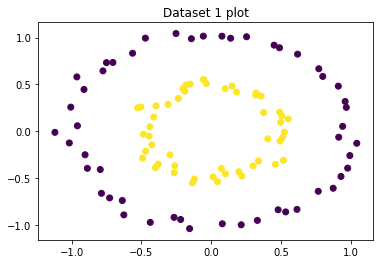

In [46]:
plt.figure()
plt.title('Dataset 1 plot')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('dataset1_plot.png')
plt.show()

1.0


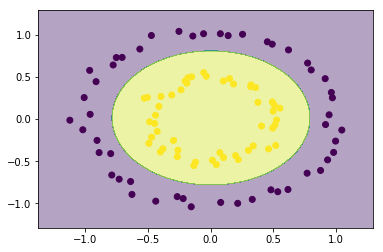

In [47]:
kX = np.hstack((X, poly_kernel(X)))
clf = SVC(kernel='linear')
clf.fit(kX, y)
r = predict(kX, clf._get_coef()[0], clf.intercept_)
print(score(r, y))
plot_decision_boudary(clf, kX, y, poly_kernel)

## Soft margin SVM with linear kernel

0.35


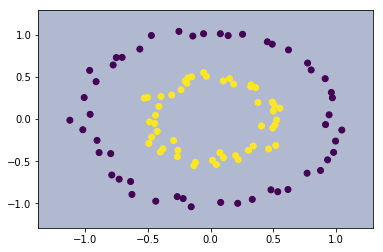

In [48]:
clf = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf.fit(X_train, y_train)
r = predict(X_test, clf._get_coef()[0], clf.intercept_)
print(score(r, y_test))
plot_decision_boudary(clf, X, y, None)

## Soft margin SVM with rbf kernel

1.0


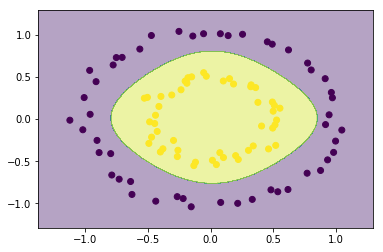

In [49]:
gamma = -1
clf = SVC(kernel='linear', C=1)
kX = np.hstack((X, rbf_kernel(X, gamma)))
X_train, X_test, y_train, y_test = train_test_split(kX, y, test_size=0.20)
clf.fit(X_train, y_train)
r = predict(X_test, clf._get_coef()[0], clf.intercept_)
print(score(r, y_test))
plot_decision_boudary(clf, kX, y, rbf_kernel, gamma)

## Dataset 2

In [50]:
filename = 'data_2.h5'
f = h5py.File(filename, 'r')

X = np.array(f[list(f.keys())[0]])
y = np.array(f[list(f.keys())[1]])
print('Number of samples in dataset 2: ', len(y))

unique, counts = np.unique(y, return_counts=True)
print('Distribution of samples among different classes: ', counts)

Number of samples in dataset 2:  100
Distribution of samples among different classes:  [50 50]


### Scatter the data

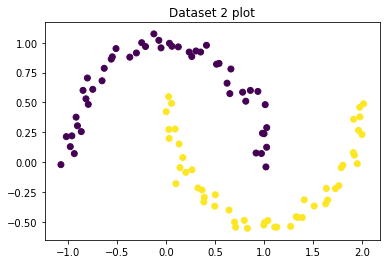

In [51]:
plt.figure()
plt.title('Dataset 2 plot')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('dataset2_plot.png')
plt.show()

1.0


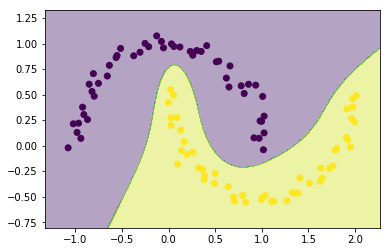

In [52]:
gamma = -4
kX = np.hstack((X, rbf_kernel(X, gamma)))
clf = SVC(kernel='linear', C=100)
clf.fit(kX, y)
r = predict(kX, clf._get_coef()[0], clf.intercept_)
print(score(r, y))
plot_decision_boudary(clf, X, y, rbf_kernel, gamma)

## Soft margin SVM with linear kernel

0.8


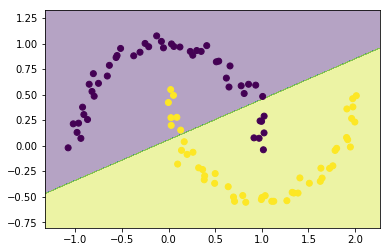

In [53]:
clf = SVC(kernel='linear', C=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
plot_decision_boudary(clf, X, y, None)

## Soft margin SVM with rbf kernel

0.9


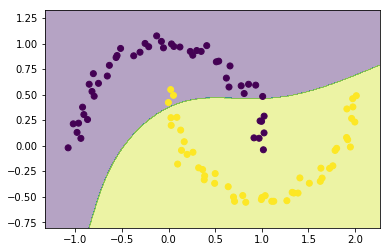

In [54]:
gamma = -1
clf = SVC(kernel='linear', C=1)
kX = np.hstack((X, rbf_kernel(X, gamma)))
X_train, X_test, y_train, y_test = train_test_split(kX, y, test_size=0.20)
clf.fit(X_train, y_train)
r = predict(X_test, clf._get_coef()[0], clf.intercept_)
print(score(r, y_test))
plot_decision_boudary(clf, kX, y, rbf_kernel, gamma)

## Dataset 3

In [55]:
filename = 'data_3.h5'
f = h5py.File(filename, 'r')

X = np.array(f[list(f.keys())[0]])
y = np.array(f[list(f.keys())[1]])
print('Number of samples in dataset 3: ', len(y))

unique, counts = np.unique(y, return_counts=True)
print('Distribution of samples among different classes: ', counts)

Number of samples in dataset 3:  100
Distribution of samples among different classes:  [34 33 33]


### Scatter the data

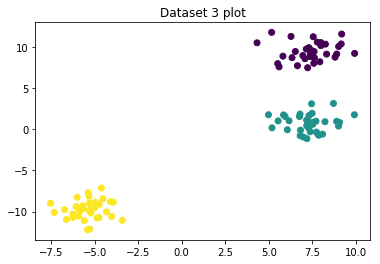

In [56]:
plt.figure()
plt.title('Dataset 3 plot')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('dataset3_plot.png')
plt.show()


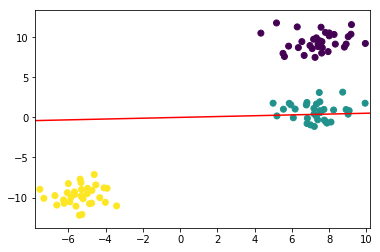

In [131]:
clf = SVC(kernel='linear')
clf.fit(X, y)
clf.score(X, y)

plot_decision_boudary(clf, X, y, None, 0)


## Dataset 4

In [132]:
filename = 'data_4.h5'
f = h5py.File(filename, 'r')

X = np.array(f[list(f.keys())[0]])
y = np.array(f[list(f.keys())[1]])
print('Number of samples in dataset 4: ', len(y))

unique, counts = np.unique(y, return_counts=True)
print('Distribution of samples among different classes: ', counts)

Number of samples in dataset 4:  2000
Distribution of samples among different classes:  [1000 1000]


### plotting the data

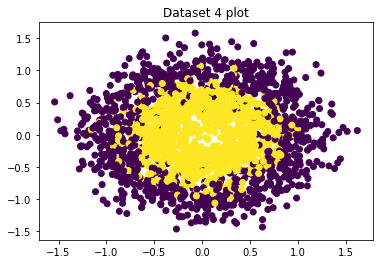

In [134]:
plt.figure()
plt.title('Dataset 4 plot')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('dataset4_plot.png')
plt.show()

In [135]:
clf = SVC(kernel='poly', degree=2)
clf.fit(X[:500], y[:500])

/home/ankur/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)